Grupo 5

María Paulina Arias CC 1193085377

Andrea Espinosa Villadiego CC 1003399277

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.0 MB/s eta 0:00:00


In [3]:
!pip install statsmodels

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pingouin as pg
from scipy.signal import find_peaks
from scipy.stats import mannwhitneyu,levene

In [5]:
data = scipy.io.loadmat('/content/drive/MyDrive/Signals/signals.mat') #Carga de datos
data.keys() #Obtención de las llaves

#Se confirma que ambos datasets tienen el mismo tamaño
asRecording = np.transpose(data['ECG_asRecording'])
filtered = np.transpose(data['ECG_filtered'])


1. Implementación de funciones: RMS en forma discreta

In [6]:
def rms(vect):
    v = np.arange(0, len(vect))  # Índices del vector
    z = []
    for i in v:
        z.append(vect[i]**2)  # Eleva al cuadrado cada elemento del vector
    return np.sqrt(np.sum(z) / len(vect))  # Raíz cuadrada de la media de los cuadrados

#Ejemplo
vect = [2,4,2]
resultado = rms(vect)
print(resultado)

2.8284271247461903


**Análisis estadístico de ECG**

In [7]:
fs = 1024 #Hz
Tm = 1/fs #s
tiempo = np.arange(0,len(asRecording)*Tm,Tm) #Creación del vector de tiempo

**Graficación señal sin filtrar (cruda)**

Text(0.5, 1.0, 'Señal cruda')

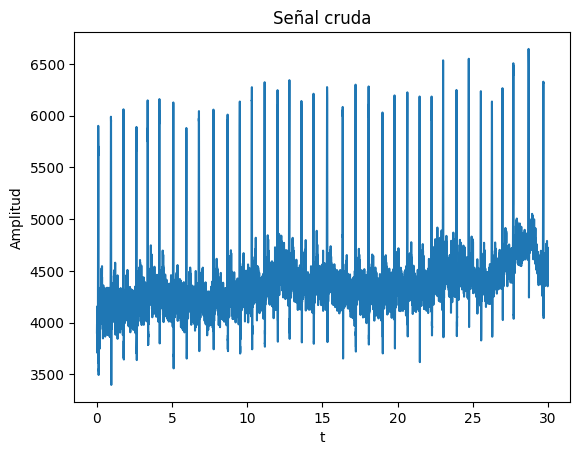

In [8]:
plt.plot(tiempo,asRecording) #Graficación de la señal cruda
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Señal cruda")

**Graficación señal filtrada**

Text(0.5, 1.0, 'Señal filtrada')

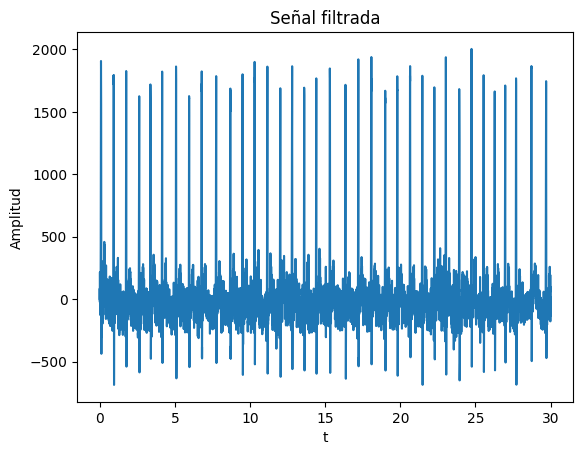

In [9]:
plt.plot(tiempo,filtered) #Graficación de la señal filtrada
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Señal filtrada")

Se observa que se aplicó un offset a la señal cruda tal que las fluctuaciones de señal filtrada se den alrededor de la media 0. Además, también se ve la aplicación de un *detrending lineal*, ya que se evidencia que se eliminaron tendencias lineales de la señal cruda para centrarse en las fluctuaciones signficativas alrededor de la media 0 [1].

Probablemente se hizo uso de un filtro pasa-bajas debido a que la frecuencia del ruido disminuyo en gran medida entre la señal cruda y filtrada, lo que permite un mejor estudio de la señal, teniendo en cuenta que la frecuencia para el ECG se encuentra entre 0.05 y 100 Hz, el uso de estos filtros permite eliminar el ruido causado por movimientos. Este filtro pasa bajas pudo estar complemetado con el uso de filtros pasa bandas y un filtro pasa altos, para obtener un mejor filtrado de la señal, que ayuda a elimimar ruidos producidos por interferencias electricas externas [2].


**Graficación de un ciclo cardiaco de la señal tal cual se registró (señal cruda)**

Cálculo del promedio, varianza, valor RMS y desviación estándar del ciclo.

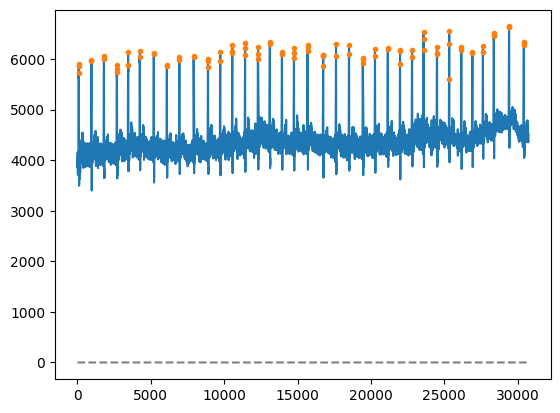

In [10]:
x = asRecording.flatten() #Identificación de los picos de la señal cruda
peaks, _ = find_peaks(x, height=5500) #Altura a partir de la cual se escogen los picos
plt.plot(x) #Graficación de la señal cruda
plt.plot(peaks, x[peaks], ".") #Puntos para identificar los picos graficamente
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show() #Mostrar la ubicación de los picos en el eje x

Varianza:  93646.2220564969
RMS:  4142.454957820607
Promedio:  4131.136266878161
Desviación estándar:  306.01670225086883


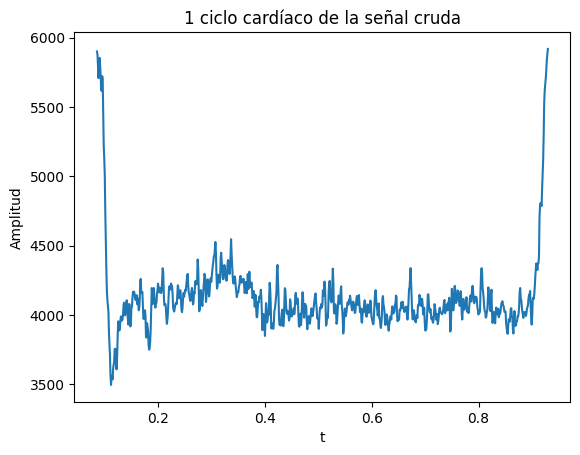

In [11]:
#Escoger un ciclo de la señal basado en sus picos
pico1 = peaks[0]
pico2 = peaks[3]
ciclo = x[pico1:pico2] #Rango en amplitud
t_ciclo = tiempo[pico1:pico2] #Rango en tiempo

#Graficación
plt.plot(t_ciclo,ciclo)
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("1 ciclo cardíaco de la señal cruda")

#Cálculo de promedio, varianza, valor RMS y desviación estándar del ciclo
print("Varianza: ", np.var(ciclo))
print("RMS: ", rms(ciclo))
print("Promedio: ", np.mean(ciclo))
print("Desviación estándar: ", np.std(ciclo))

La varianza presenta un valor significativo (93646.222) con respecto a la media del ciclo de la señal (4131.13), lo que indica que los datos presentan una gran dispersión, esto causado por diferencia en amplitud de los datos. Además, la desviación me indica que los datos tienden a desviarse en 306.03 al compararlos con el promedio, lo que indica una gran variabilidad de los datos.

El RMS presenta un valor acorde a lo esperado según el promedio, lo que indica que la intensidad de la señal se ve represetada en valores cercacanos al promedio y no se desvía drásticamente de la media en términos de magnitud general, a pesar de la alta dispersión observada.

**Graficación de un ciclo cardiaco de la señal filtrada.**

Cálculo del promedio, varianza, valor RMS y desviación estándar del ciclo.

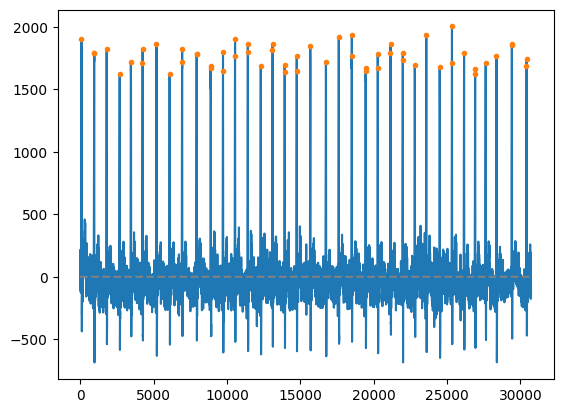

In [12]:
y = filtered.flatten() #Flatten de la señal para pasarla a 1 dimensión
peaks, _ = find_peaks(y, height=1620) #Encontrar los picos con una altura superior a 1620

#Graficación
plt.plot(y)
plt.plot(peaks, y[peaks], ".") #Identificación grafica de los picos de la señal
plt.plot(np.zeros_like(x), "--", color="gray") #Eje 0
plt.show()

Varianza:  96684.31488232457
RMS:  319.62757818893766
Promedio:  74.00995782055861
Desviación estándar:  310.94101511753735


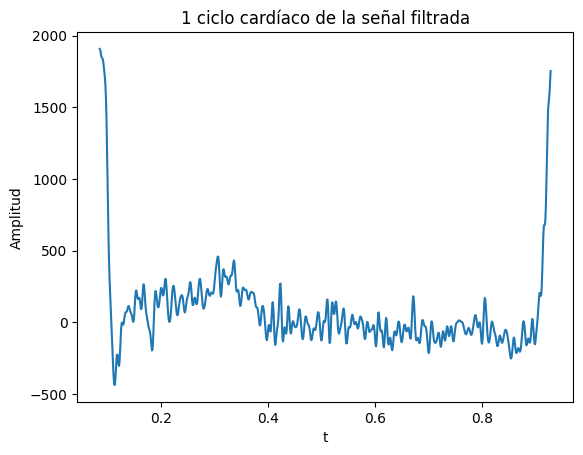

In [13]:
#Selección de un ciclo de la señal filtrada en base a los picos encontrados
pico1 = peaks[0]
pico2 = peaks[1]
ciclo_f = y[pico1:pico2]
t_ciclo_f = tiempo[pico1:pico2]

#Graficación y cálculo de valores
plt.plot(t_ciclo_f,ciclo_f)
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("1 ciclo cardíaco de la señal filtrada")
print("Varianza: ", np.var(ciclo_f))
print("RMS: ", rms(ciclo_f))
print("Promedio: ", np.mean(ciclo_f))
print("Desviación estándar: ", np.std(ciclo_f))

La señal filtrada presenta un valor de varianza significativo, lo que también indica una dispersión de los datos con respecto a la media de la señal, esto también se evidencia en el valor de la desviación estándar que indica una variabilidad en los datos de la señal.

Además, el promedio (aproximadamente 74) es más cercano a 0 a comparación de la señal cruda, lo que indica el uso del filtrado para la señal.

**Comparación entre los resultados obtenidos (promedio, varianza, valor RMS y desviación estándar) entre la señal filtrada y cruda**

**Señal filtrada:**

*   Varianza:  96684.31
*   RMS:  319.63
*   Promedio:  74.01
*   Desviación estándar:  310.94

**Señal cruda:**

*   Varianza:  93646.22
*   RMS:  4142.45
*   Promedio:  4131.14
*   Desviación estándar:  306.02
  

Los cambios más significativos se evidencian en el valor RMS y el promedio. Este último se ve altamente afectado por la tendencia lineal que caracteriza a la señal cruda, lo que produce que la amplitud de los datos sea mucho más alta de lo que en realidad es, y esta diferencia se hace más significativa conforme el tiempo avanza. Lo que consecuentemente afecta el valor RMS ya que mide la magnitud efectiva de la señal mediante la cuantificación del valor promedio de una variable, indicando el valor al cual tienden con mayor frecuencia las amplitudes durante gran parte del ciclo, la cual se redujo significativamente por el proceso de filtrado


Por otro lado, la varianza y la desviación estándar están directamente relacionadas entre sí y no se ven significativamente afectadas debido a que el detrending lineal influye directamente sobre la tendencia general de los datos, más no sobre las fluctuaciones alrededor de dicha tendencia. Lo que podría indicar que el proceso de filtrado conservó las características importantes de la señal sin eliminar componentes esenciales o introducir nuevas variaciones.

**15 ciclos de la señal filtrada (promedio y varianza de cada ciclo)**

Comparación gráfica y estadística ¿Se considera una señal estacionaria?

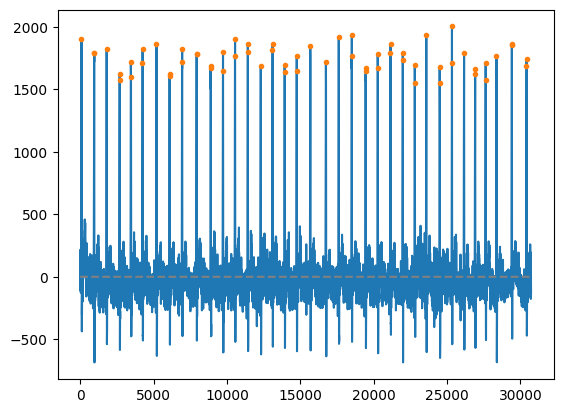

[   88   952   959  1806  2683  2693  3454  3464  4247  4256  5201  6090
  6096  6942  6950  7929  7936  8892  8901  9727  9733 10548 10554 11417
 11424 12304 13104 13111 13930 13938 14748 14756 15678 16743 17619 18501
 18508 19446 19453 20273 20279 21140 21148 21974 21981 22798 22804 23582
 24493 24502 25325 25331 26156 26903 26911 27619 27627 28365 29407 29413
 30406 30414]
[   88   952  1806  2683  3454  4247  5201  6090  6942  7929  8892  9727
 10548 11417 12304 13104 13930 14748 15678 16743 17619 18501 19446 20273
 21140 21974 22798 23582 24493 25325 26156 26903 27619 28365 29407 30406]
88
952
Varianza:  96684.31488232457
Promedio:  74.00995782055861


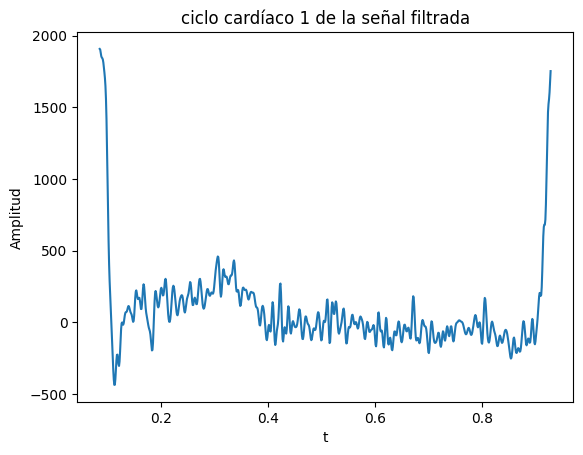

952
1806
Varianza:  104790.46548941819
Promedio:  -1.4625781779933433


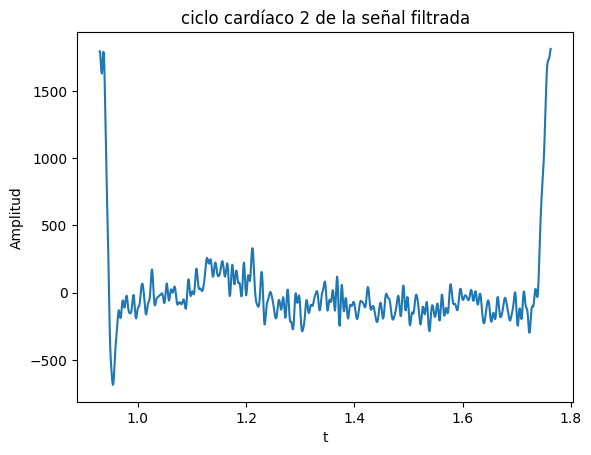

1806
2683
Varianza:  56555.25326369125
Promedio:  -27.8165204625197


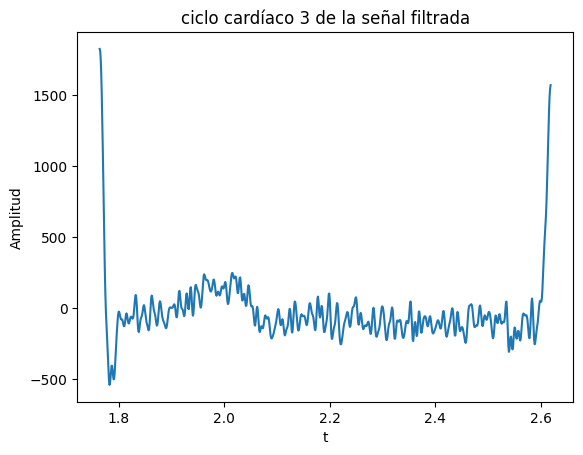

2683
3454
Varianza:  76435.39753403219
Promedio:  -1.064971744993113


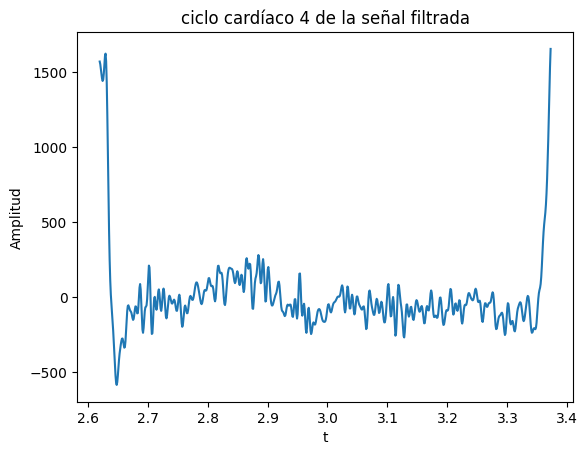

3454
4247
Varianza:  85305.73350400828
Promedio:  22.275921001828472


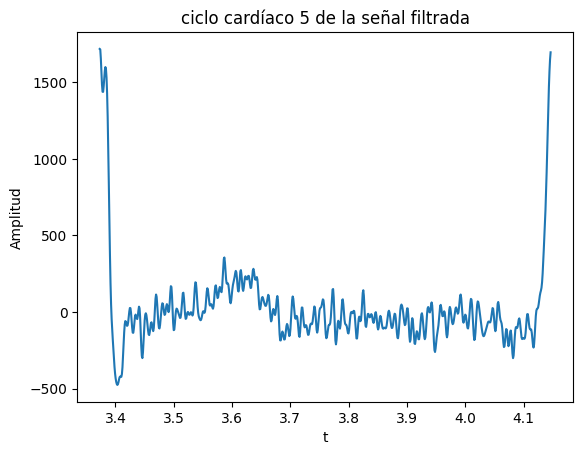

4247
5201
Varianza:  84866.00041141169
Promedio:  -11.837534752745318


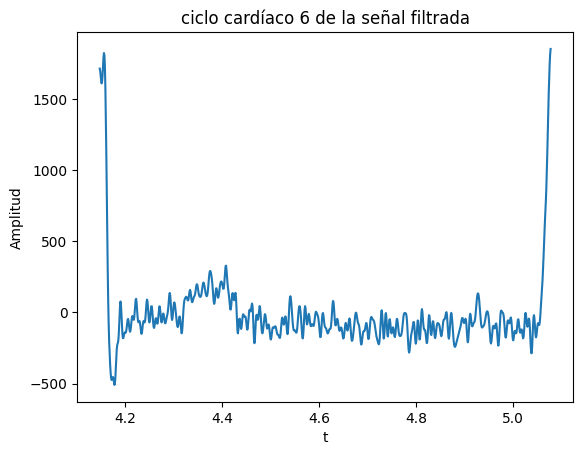

5201
6090
Varianza:  77707.28120177508
Promedio:  0.43078685936823324


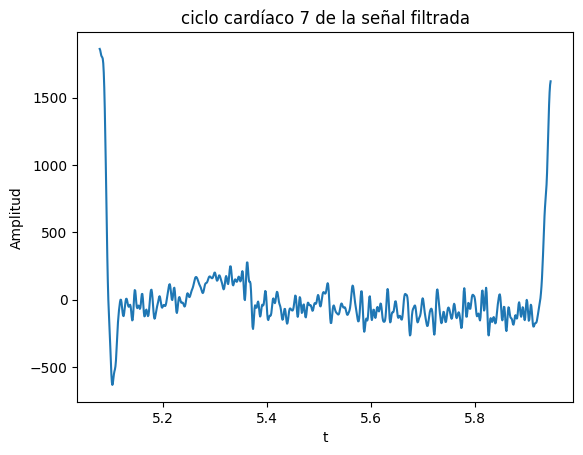

6090
6942
Varianza:  74040.59816426696
Promedio:  5.515211417309358


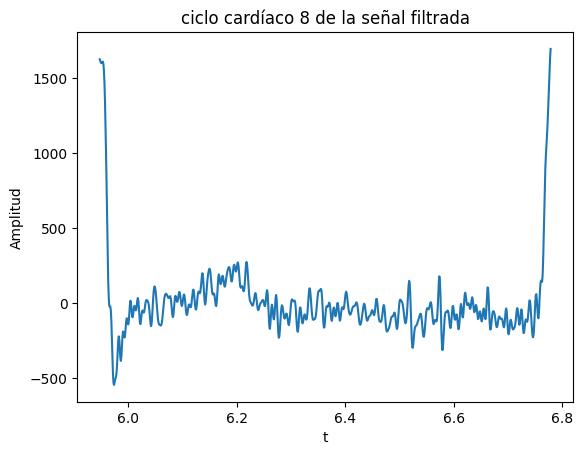

6942
7929
Varianza:  74286.87428547705
Promedio:  -8.555537442968186


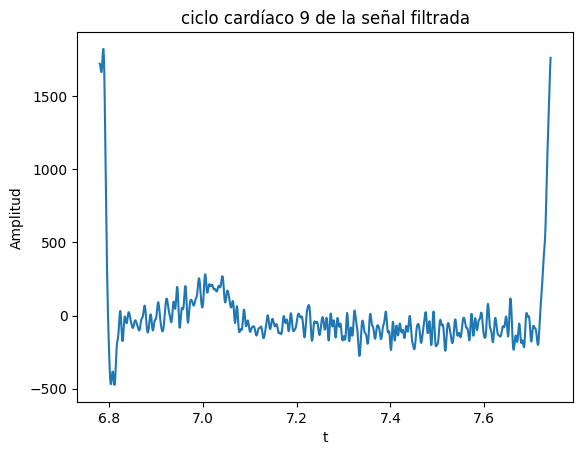

7929
8892
Varianza:  67264.69241771422
Promedio:  6.706483861784038


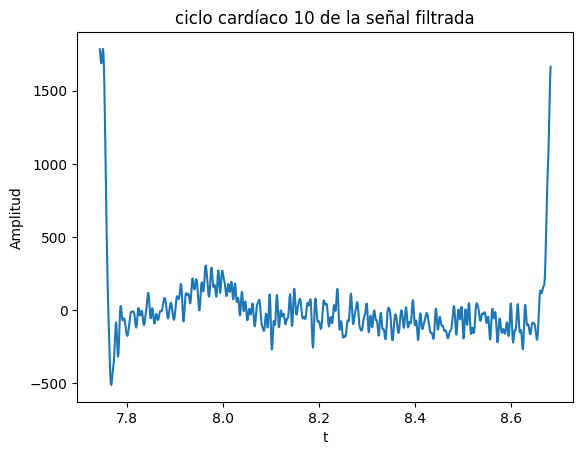

8892
9727
Varianza:  82112.22500135408
Promedio:  -4.045691039985618


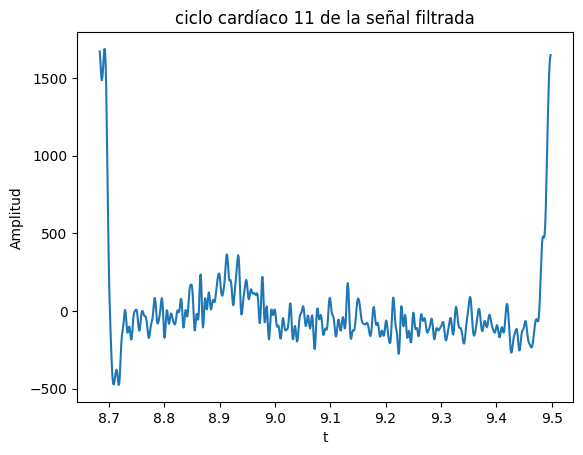

9727
10548
Varianza:  91702.93437808516
Promedio:  12.583483402095343


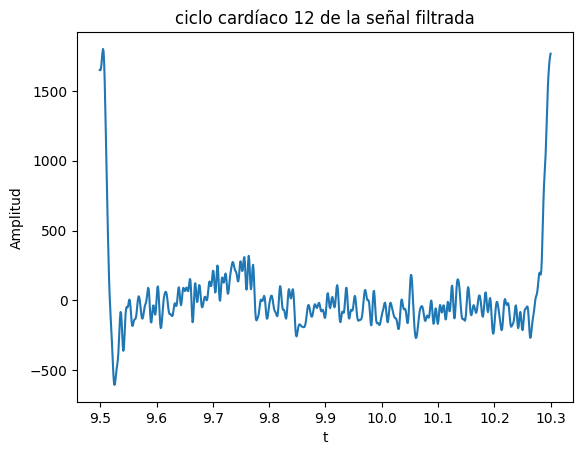

10548
11417
Varianza:  84685.52689405573
Promedio:  -6.17121898022013


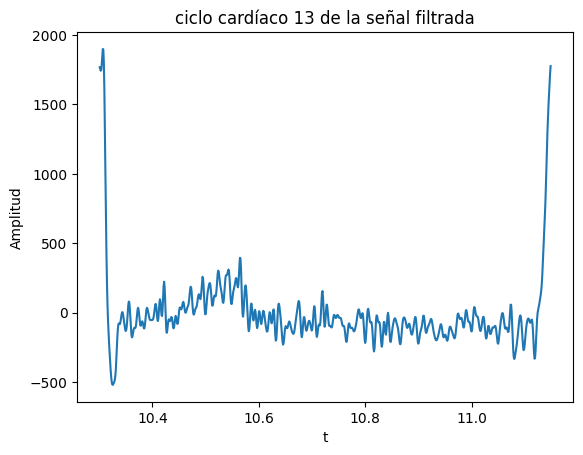

11417
12304
Varianza:  101251.21293741121
Promedio:  -0.9171143306123031


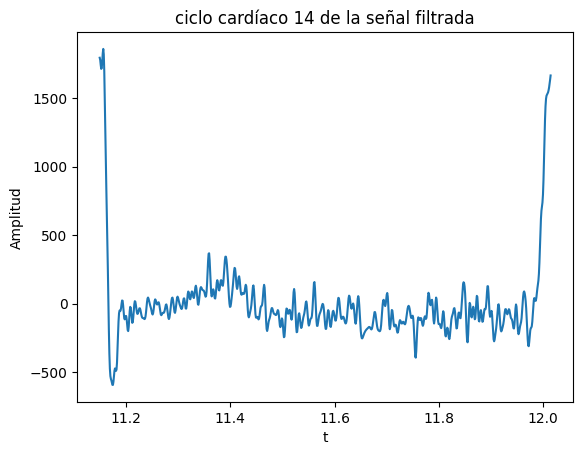

12304
13104
Varianza:  63632.94852978466
Promedio:  11.869783939427746


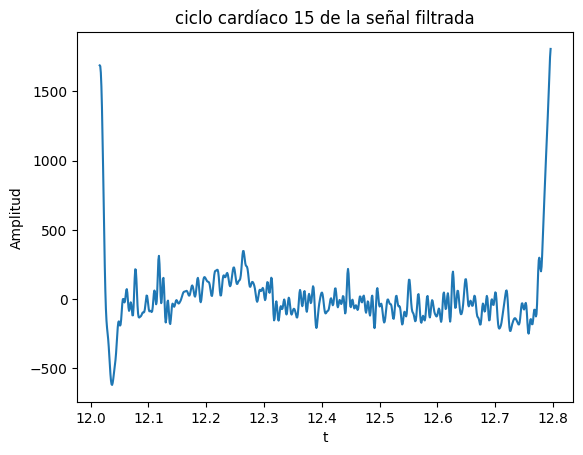

In [14]:
y = filtered.flatten()
peaks, _ = find_peaks(y, height=1500) #ALtura desde la cual se escogen los picos de la señal

#Graficación
plt.plot(y)
plt.plot(peaks, y[peaks], ".") #Identificación grafica de los picos de la señal
plt.plot(np.zeros_like(x), "--", color="gray") #Eje 0
plt.show()

print(peaks)

pico1 = peaks[0]
pico2 = peaks[1]

# Identificación de los picos a eliminar según la resta entre uno y el siguiente
ind_eliminar = [i+1 for i in range(len(peaks)-1) if peaks[i+1]-peaks[i]<100]

#Generación del nuevo vector de picos a emplear eliminando los picos identificados que no son eficentes
peaks_filt = np.delete(peaks,ind_eliminar)

print(peaks_filt)

#Graficación de los 15 ciclos de la señal
for i in range(15):
    pico_inicial = peaks_filt[i]
    pico_final = peaks_filt[i + 1]
    ciclovs = y[pico_inicial:pico_final] #Rango de amplitud del ciclo
    tiempo_ciclo = tiempo[pico_inicial:pico_final] #Tiempo del ciclo

    print(pico_inicial)
    print(pico_final)
    print("Varianza: ", np.var(ciclovs))
    print("Promedio: ", np.mean(ciclovs))

    plt.plot(tiempo_ciclo,ciclovs)
    plt.xlabel("t")
    plt.ylabel("Amplitud")
    plt.title(f"ciclo cardíaco {i+1} de la señal filtrada")
    plt.show()

Se evalúan 15 ciclos para analizar una parte significativa de la señal que permita evaluar sucomportamiento, en los cuales se observa:

Ciclos de una duración aproximada de 0.8 segundos, lo que va acorde con la duración media de un ciclo de la señal cardiaca [3], con valores máximos de amplitud que se encuentran entre 1500 y 2000 mV, y las fluctuaciones se dan alrededor de la media 0. Su diferencia principal radica en los valores de promedio y varianza, los cuales varían significativamente entre uno y otro, lo que es un indicador que la señal evaluada no es estacionaria, ya que no se pueden predecir valores futuros con certeza.

## **COMPARACIÓN ENTRE EL CICLO 1 Y 2**

**Prueba de normalidad ciclo 1**

In [15]:
# Ho = Los datos siguen una distribución normal
# Ha = Los datos NO siguen una distribución normal

statistic, p_value = stats.normaltest(y[peaks_filt[0]:peaks_filt[1]])
#Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechaza hipótesis nula: Los datos NO siguen una distribución normal.")
else:
    print("No se rechaza hipótesis nula: Los datos siguen una distribución normal.")


# Test de normalidad Shapiro-Wilk

pg.normality(y[peaks_filt[0]:peaks_filt[1]])


Rechaza hipótesis nula: Los datos NO siguen una distribución normal.


,W,pval,normal
0,0.618228,6.428307e-40,False


**Prueba de normalidad ciclo 2**

In [16]:
# Ho = Los datos siguen una distribución normal
# Ha = Los datos NO siguen una distribución normal

statistic, p_value = stats.normaltest(y[peaks_filt[1]:peaks_filt[2]])
#Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechaza hipótesis nula: Los datos NO siguen una distribución normal.")
else:
    print("No se rechaza hipótesis nula: Los datos siguen una distribución normal.")


# Test de normalidad Shapiro-Wilk

pg.normality(y[peaks_filt[1]:peaks_filt[2]])

Rechaza hipótesis nula: Los datos NO siguen una distribución normal.


,W,pval,normal
0,0.550296,4.438228e-42,False


**Homocedasticidad**

Dado que no se cumple el criterio de normalidad, se emplea el test de Levene.

In [17]:
# Ho = La varianza es igual entre diferentes grupos (homocedasticidad)
# Ha = La varianza NO es igual en los diferentes grupos (heterocedasticidad)

Stat_levene, p_levene = levene(y[peaks_filt[0]:peaks_filt[1]],y[peaks_filt[1]:peaks_filt[2]])

if p_levene > 0.05:
  print('No se rechaza la hipotesis nula: La varianza es igual para los diferentes grupos ')
else:
  print('Se rechaza la hipostesis nula: La varianza difiere para los diferentes grupos')

No se rechaza la hipotesis nula: La varianza es igual para los diferentes grupos 


**Independencia** (se asume que los grupos son independientes)

No se puede realizar la prueba t ya que no se cumplen los tres requisitos (la prueba de normalidad dice que los datos no presentan una distribución normal). Por lo tanto se realiza la **Prueba U de Mann-Whitney**

In [18]:
# Ho = Los grupos provienen de una misma distribución (pertecenen a una misma población)
# Ha = Hay diferencias significativas entre los grupos, provienen de distribuciones diferentes (No pertenecen a una misma población)


stat, p_value = mannwhitneyu(y[peaks_filt[0]:peaks_filt[1]],y[peaks_filt[1]:peaks_filt[2]])

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre los grupos.")

Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.


Haciendo uso de la prueba U de Mann-Whitney para el ciclo 1 y 2 se observa que la hipotesis nula se rechaza, lo que indica que hay diferencias significativas en los datos, por ejemplo en la amplitud de los ciclos y que este no sigue una periodicidad estrictamente constante.

## **COMPARACIÓN ENTRE EL CICLO 10 Y 11**

**Prueba de normalidad ciclo 10**

In [19]:
# Ho = Los datos siguen una distribución normal
# Ha = Los datos NO siguen una distribución normal

statistic, p_value = stats.normaltest(y[peaks_filt[9]:peaks_filt[10]])
#Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechaza hipótesis nula: Los datos NO siguen una distribución normal.")
else:
    print("No se rechaza hipótesis nula: Los datos siguen una distribución normal.")


# Test de normalidad Shapiro-Wilk

pg.normality(y[peaks_filt[9]:peaks_filt[10]])

Rechaza hipótesis nula: Los datos NO siguen una distribución normal.


,W,pval,normal
0,0.5493,3.907633e-44,False


**Prueba de normalidad ciclo 11**

In [20]:
# Ho = Los datos siguen una distribución normal
# Ha = Los datos NO siguen una distribución normal

statistic, p_value = stats.normaltest(y[peaks_filt[10]:peaks_filt[11]])
#Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechaza hipótesis nula: Los datos NO siguen una distribución normal.")
else:
    print("No se rechaza hipótesis nula: Los datos siguen una distribución normal.")


# Test de normalidad Shapiro-Wilk

pg.normality(y[peaks_filt[10]:peaks_filt[11]])

Rechaza hipótesis nula: Los datos NO siguen una distribución normal.


,W,pval,normal
0,0.568435,4.097159e-41,False


**Homocedasticidad**

Dado que no se cumple el criterio de normalidad, se emplea el test de Levene.

In [21]:
# Ho = La varianza es igual entre diferentes grupos (homocedasticidad)
# Ha = La varianza NO es igual en los diferentes grupos (heterocedasticidad)

Stat_levene, p_levene = levene(y[peaks_filt[9]:peaks_filt[10]],y[peaks_filt[10]:peaks_filt[11]])

if p_levene > 0.05:
  print('No se rechaza la hipotesis nula: La varianza es igual para los diferentes grupos ')
else:
  print('Se rechaza la hipostesis nula: La varianza difiere para los diferentes grupos')

No se rechaza la hipotesis nula: La varianza es igual para los diferentes grupos 


**Independencia** (se asume que los grupos son independientes)

No se puede realizar la prueba t ya que no se cumplen los tres requisitos (la prueba de normalidad dice que los datos no presentan una distribución normal). Por lo tanto se realiza la **Prueba U de Mann-Whitney**

In [22]:
# Ho = Los grupos provienen de una misma distribución (pertecenen a una misma población)
# Ha = Hay diferencias significativas entre los grupos, provienen de distribuciones diferentes (No pertenecen a una misma población)

stat, p_value = mannwhitneyu(y[peaks_filt[9]:peaks_filt[10]],y[peaks_filt[10]:peaks_filt[11]])

# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre los grupos.")

Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.


La prueba U Mann Whitney para los ciclos 10 y 11, al igual que para los dos primeros ciclos comparados demuestran que los datos presentan diferencias significativas entre sí y que es un comportamiento que se ve durante los diferentes ciclos de la señal, lo que da a entender que está presenta una gran variabilidad de sus datos.

Con esto se pude establecer que la señal no presenta estacionaridad

**PRUEBA DE DICKEY-FULLEY (ESTACIONARIEDAD)**

In [23]:
# Ho: La serie NO es estacionaria
# Ha: La serie es estacionaria

from statsmodels.tsa.stattools import adfuller

#Dickey-Fuller Aumentada
resultado = adfuller(filtered)

#Resultado
alpha = 0.05
if resultado[1] < alpha:
    print("Se rechaza la hipótesis nula: la serie es estacionaria.")
else:
    print("No se rechaza la hipótesis nula: la serie no es estacionaria.")

No se rechaza la hipótesis nula: la serie no es estacionaria.


La prueba de Dickey-Fulley permite comprobar la no estacionariedad que se esperaba anteriormnete gracias al análisis de los 15 ciclos, esto se sustenta en que los cálculos de varianzas y promedios en los ciclos difieren significativamente entre sí. Este resultado es esperable ya que la señal ECG y en general, las señales fisiológicas, depende de múltiples variables dinámicas como la regulación homeostática y la influencia de factores externos. Entonces, su naturaleza intrínsecamente variable provoca cambios en las propiedades estadísticas de estas señales a lo largo del tiempo, lo que las hace no estacionarias bajo condiciones normales.

**Conclusiones**

El procesamiento digital de señales evidencia ser útil en el análisis de ECG para la identificación de cambios en la actividad cardíaca, ya que permite ver las variaciones de diferentes métricas estadísticas a lo largo del tiempo para identificar ciertos patrones cardiacos y características de la señal para mejorar su comprensión, pudiendo identificar cómo se puede extender su aplicación para realizar análisis comparativos entre diferentes estados fisiológicos. De esta manera, se resalta la importancia del análisis de diferentes variables estadísticas que sirven como indicadores y métricas clave en la evaluación de señales de ECG.

**Referencias**



*   [1] Sistema para la detección de señales precordiales mediante sismocardiografía. (s.f.). SciELO Colombia- Scientific Electronic Library Online. http://www.scielo.org.co/scielo.php?pid=S1692-82612016000100012&amp;script=sci_arttext


*   [2] Álvarez Escobar, L. L. (s.f.). Análisis de esquemas de filtrado para señales electrocardiográfica (ecg). CORE – Aggregating the world’s open access research papers. https://core.ac.uk/download/pdf/71395502.pdf



*   [3] G367: Tema 3. Mecánica cardíaca: El ciclo cardíaco. (s.f.). OCW - Universidad de Cantabria. https://ocw.unican.es/mod/page/view.php?id=507#:~:text=En%20un%20adulto%20normal%20la,la%20sístole%200,3%20segundos.




